<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Energy efficiency - Predict Heating Load and Cooling Load</font></h1>
<h2 align="center"><font size="5">Deadline: 2021-08-29 13:00:00 (Sunday)</font></h2>
<h3 align="center"><font size="5">Total marks: 3.0</font></h3>

### Your information:
- Fullname: Đàm Thị Minh Phượng
- Date of birth: 27/05/1990
- Place of birth: HoChiMinh City
- Email: minhphuong.dam@gmail.com
- Mobile phone: 0903222123

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Linear Regression Algorithm** to predict: **"heating load and cooling load"** by accuracy evaluation methods.

Please read [Energy efficiency Data Set](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) carefully before you do this project!

Dataset: ENB2012_data.xlsx

### Attribute Information:
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

#### Specifically:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- **y1 Heating Load**
- **y2 Cooling Load**

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
#Chi-square test
from scipy.stats import chi2_contingency, chi2
#ANOVA test
import statsmodels.api as sm
from statsmodels.formula.api import ols

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('ENB2012_data.xlsx',engine='openpyxl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X1           768 non-null    float64
 1   X2           768 non-null    float64
 2   X3           768 non-null    float64
 3   X4           768 non-null    float64
 4   X5           768 non-null    float64
 5   X6           768 non-null    float64
 6   X7           768 non-null    float64
 7   X8           768 non-null    float64
 8   Y1           768 non-null    float64
 9   Y2           768 non-null    float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
dtypes: float64(12)
memory usage: 121.6 KB


In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,0.0,0.0
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760,NaN,NaN
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306,NaN,NaN
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,NaN,NaN
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,NaN,NaN
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,NaN,NaN
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,NaN,NaN
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,NaN,NaN


In [6]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33,NaN,NaN
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33,NaN,NaN
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33,NaN,NaN
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33,NaN,NaN
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28,NaN,NaN


In [7]:
# xóa bỏ 2 cột có dữ liệu là null 
df = df.dropna(how = 'all',axis=1)

In [8]:
# xóa bỏ các dòng có dữ liệu là null 
df = df.dropna(how = 'all',axis=0)

In [9]:
df.isnull().sum()      #không có giá trị null

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    float64
 6   X7      768 non-null    float64
 7   X8      768 non-null    float64
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(10)
memory usage: 66.0 KB


In [11]:
# Check duplicate 
print(df.duplicated().sum())
# Check duplicate input
print(df[df.columns[0:8]].duplicated().sum())

0
0


## 1. Data exploration & Data visualization

### 1.1 Xác định thuộc tính:

In [12]:
inputs = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
outputs = ['Y1', 'Y2']

### 1.2 Xác định Categorical/Continuous Variable

In [13]:
i = 1
for var in df.columns:
    print(i,'/', var, '\t', len(df[var].unique()),df[var].unique() if len(df[var].unique())<20 else '')
    i += 1

1 / X1 	 12 [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
2 / X2 	 12 [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
3 / X3 	 7 [294.  318.5 343.  416.5 245.  269.5 367.5]
4 / X4 	 4 [110.25 122.5  147.   220.5 ]
5 / X5 	 2 [7.  3.5]
6 / X6 	 4 [2. 3. 4. 5.]
7 / X7 	 4 [0.   0.1  0.25 0.4 ]
8 / X8 	 6 [0. 1. 2. 3. 4. 5.]
9 / Y1 	 587 
10 / Y2 	 636 


In [14]:
cat_var = ['X6', 'X7', 'X8']
cont_var = ['X1', 'X2', 'X3', 'X4', 'X5', 'Y1', 'Y2']

In [15]:
for var in cat_var:
    df[var] = df[var].astype('object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    object 
 6   X7      768 non-null    object 
 7   X8      768 non-null    object 
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(7), object(3)
memory usage: 66.0+ KB


### 1.3 Phân tích đơn biến 

#### 1.3.a) Continuous Variable 

In [17]:
def univariate_cont_analysis(var,df):
    mean = df[var].mean()
    median = df[var].median() 
    mode = df[var].mode()
    max_val = df[var].max()
    min_val = df[var].min()
    range_val = np.ptp(df[var])
    variance = df[var].var()
    skewness = df[var].skew()
    kurtosis = df[var].kurtosis()
    result = [mean,median,mode,max_val,min_val,range_val,variance,skewness,kurtosis]
    return result

In [18]:
result_list=[]
for var in cont_var:
    result = univariate_cont_analysis(var,df)
    result_list.append(result)
df_result = pd.DataFrame(result_list,columns=['mean','median','mode','max_val','min_val','range_val','variance','skewness','kurtosis'],
                  index=cont_var)
df_result

,mean,median,mode,max_val,min_val,range_val,variance,skewness,kurtosis
X1,0.764167,0.75,0 0.62 1 0.64 2 0.66 3 0.69 4 ...,0.98,0.62,0.36,0.011189,0.495513,-0.706568
X2,671.708333,673.75,0 514.5 1 563.5 2 588.0 3 612....,808.50,514.50,294.00,7759.163842,-0.125131,-1.059454
X3,318.500000,318.50,0 294.0 1 318.5 dtype: float64,416.50,245.00,171.50,1903.269883,0.533417,0.116593
X4,176.604167,183.75,0 220.5 dtype: float64,220.50,110.25,110.25,2039.963060,-0.162764,-1.776947
X5,5.250000,5.25,0 3.5 1 7.0 dtype: float64,7.00,3.50,3.50,3.066493,0.000000,-2.005229
Y1,22.307195,18.95,0 15.16 dtype: float64,43.10,6.01,37.09,101.812216,0.360446,-1.245569
Y2,24.587760,22.08,0 14.27 1 14.28 2 17.20 3 21.33 4 ...,48.03,10.90,37.13,90.502983,0.395992,-1.147190


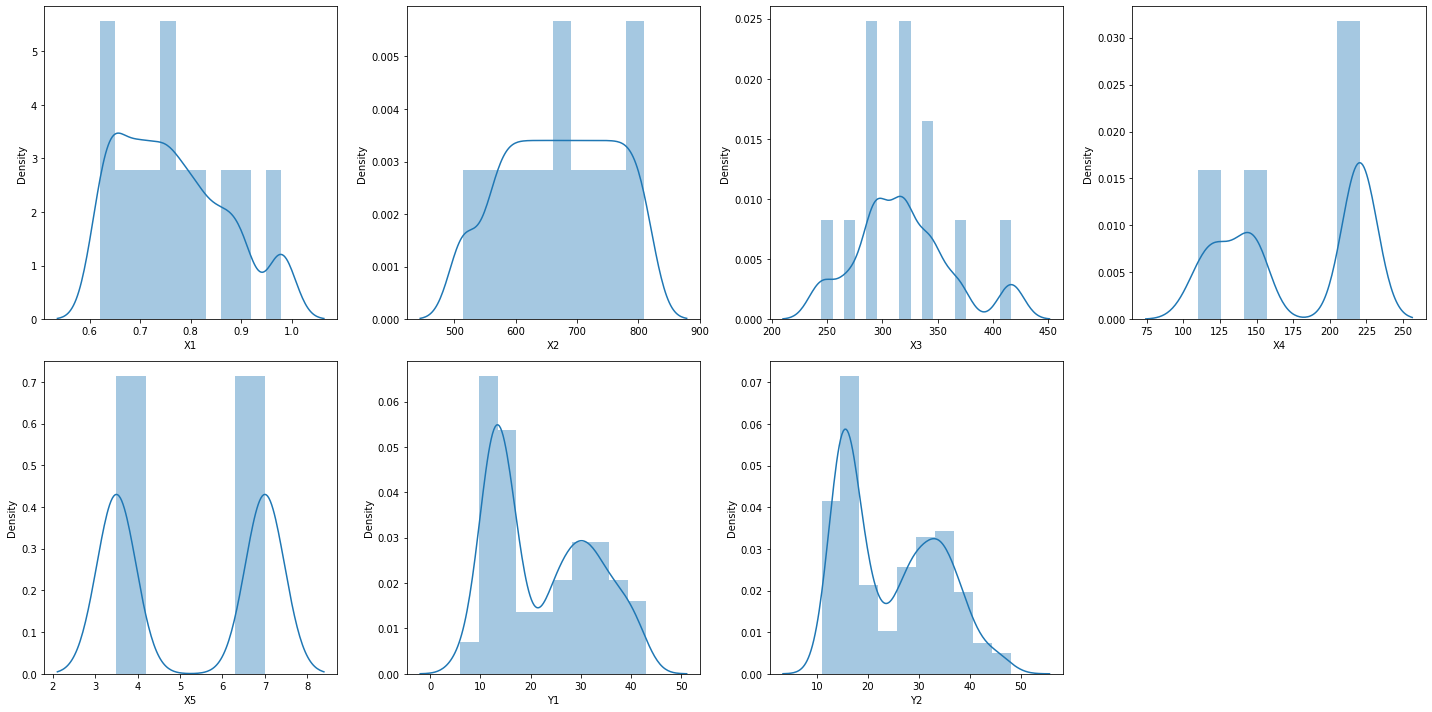

In [19]:
#Visualization - Histogram
plt.figure(figsize=(20,10))
for i in range(1,len(cont_var)+1):
    plt.subplot(2,4,i)
    sns.distplot(df[cont_var[i-1]].dropna())
plt.tight_layout()
plt.show()

### Nhận xét:
- X2,X4 phân phối lệch trái
- X5 không phải phân phối chuẩn vì kurtosis !=0
- các biến còn lại phân phối lệch phải

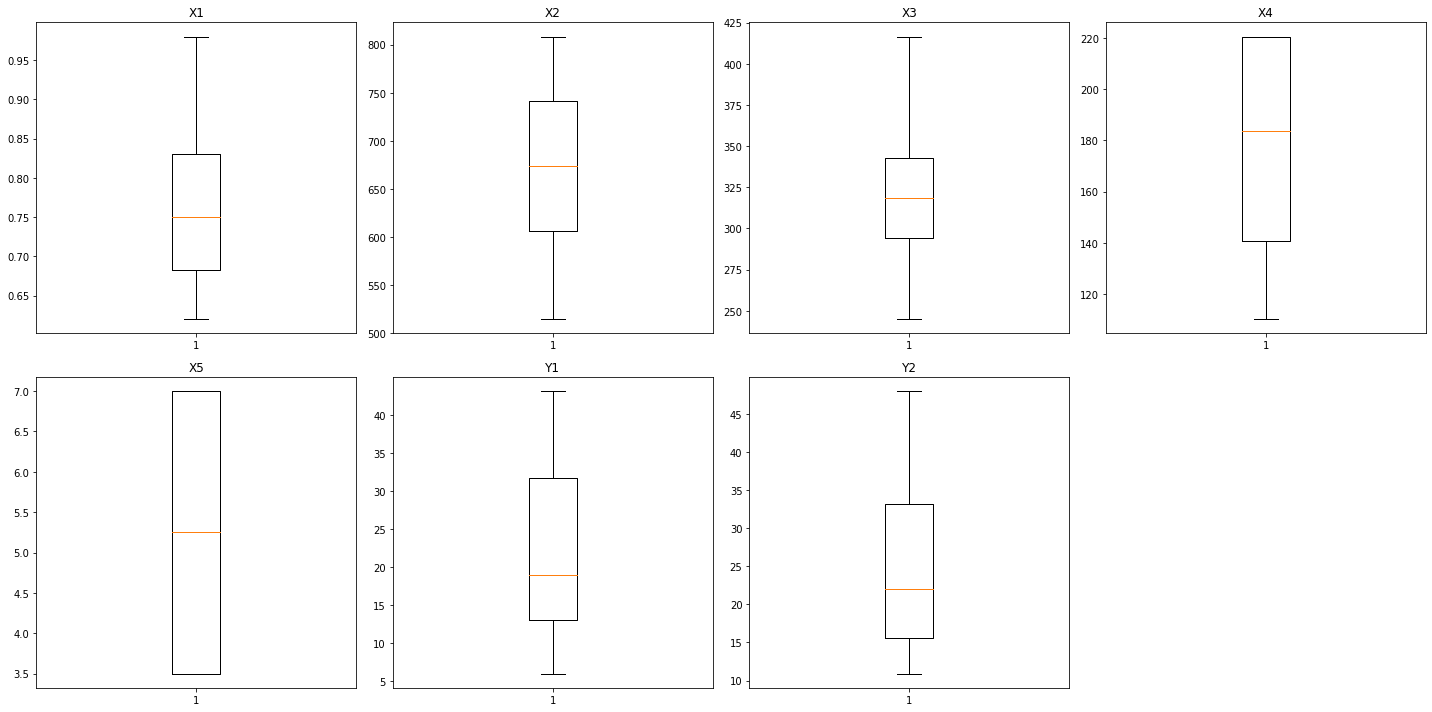

In [20]:
#Visualization - Boxplot
plt.figure(figsize=(20,10))
for i in range (1,len(cont_var)+1):
    plt.subplot(2,4,i)
    plt.boxplot(df[cont_var[i-1]].dropna())
    plt.title(cont_var[i-1])
plt.tight_layout()
plt.show()

### Nhận xét: 
- Các biến continuous không có outliers

#### 1.3.b) Categorical Variable 

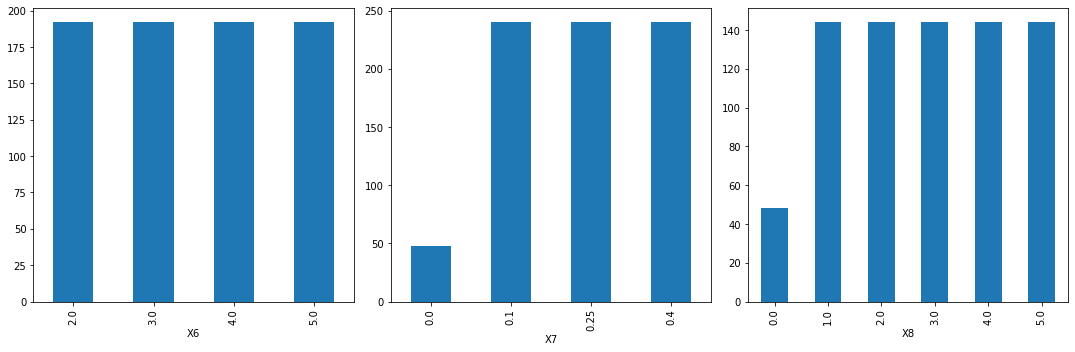

In [21]:
plt.figure(figsize=(20,5))
for i in range (1,len(cat_var)+1):
    count = df.groupby(df[cat_var[i-1]].dropna()).size()
    #print(count)
    plt.subplot(1,4,i)
    count.plot.bar()
plt.tight_layout()
plt.show()

### Nhận xét:
- Không có sự khác biệt giữa các phân loại của X6
- X7, X8 có sự khác biệt ở phân loại 0 và phân loại khác/lớn hơn 0 

### 1.4 Phân tích 2 biến
- input - input: cont-cont,cat-cat,cont-cat. ==> Expect: 2 biến độc lập
- input - output(cont): cont-cont,cat-cont.  ==> Expect: 2 biến phụ thuộc

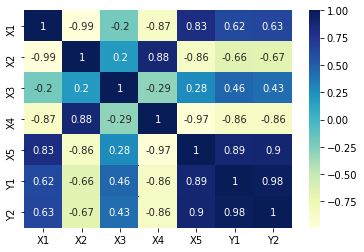

In [22]:
#continuous - continuous (output)
sns.heatmap(df[cont_var].corr(), cmap="YlGnBu", annot=True)
plt.show()

### Nhận xét:
- X1 và X2 có tương quan rất cao ~1 => chọn X2 vì có tương quan với Y1 và Y2 cao hơn
- X4 và X5 có tương quan rất cao ~0.97 => chọn X5 vì có tương quan với Y1 và Y2 cao hơn
- 2 biến output Y1 và Y2 có tương quan rất cao nhưng là output cần predict nên không bỏ

==> SELECT: X2,X3,X5,Y1,Y2

In [23]:
corr_cont_list = ['X2','X3','X5','Y1','Y2']

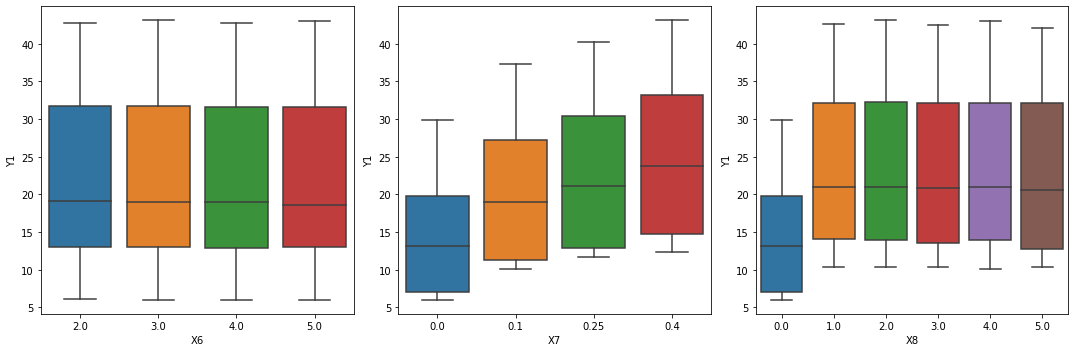

In [24]:
# categorical - Y1
plt.figure(figsize=(20,5))
for i in range(1,len(cat_var)+1):
    df_melt = df[[cat_var[i-1],'Y1']]
    plt.subplot(1,4,i)
    sns.boxplot(data=df_melt,x=cat_var[i-1],y='Y1' )
    i+=1
plt.tight_layout()
plt.show()

### Nhận xét: từ boxplot có thể nhận xét rằng
- X6 không ảnh hướng đến Y1
- X8 ảnh hướng đến Y1 nhưng chỉ ở 2 mức 0 và lớn hơn 0 => Binarizing

=> kiểm tra lại với Anova

In [25]:
#Anova Test -> tìm ra biến phân loại phụ thuộc với Y1
dependent_cat_list = []
for var in cat_var:
    model = ols('Y1 ~ C(' + var + ')', df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    #display(anova_table)
    if anova_table['PR(>F)'][0] < 0.05:
        #print(var,'p-value:',anova_table['PR(>F)'][0])
        #print('==> Dependent (Reject H0)')
        dependent_cat_list.append(var)
print(dependent_cat_list)

['X7', 'X8']


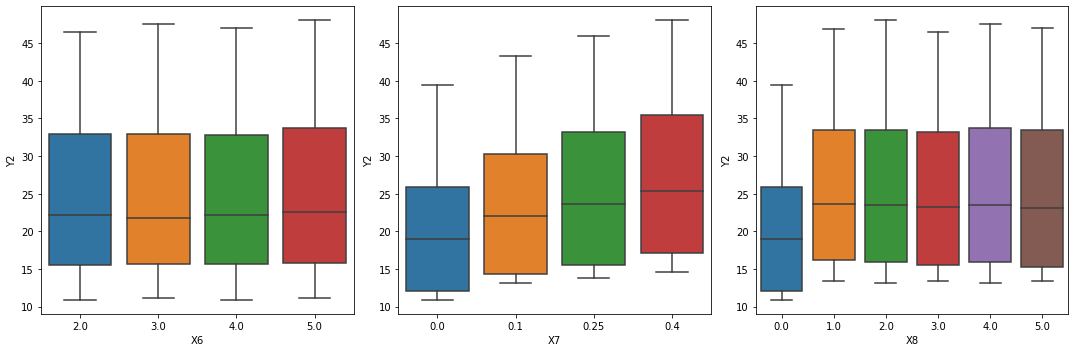

In [26]:
# categorical - Y2
plt.figure(figsize=(20,5))
for i in range(1,len(cat_var)+1):
    df_melt = df[[cat_var[i-1],'Y2']]
    plt.subplot(1,4,i)
    sns.boxplot(data=df_melt,x=cat_var[i-1],y='Y2' )
    i+=1
plt.tight_layout()
plt.show()

In [27]:
#Anova Test -> tìm ra biến phân loại phụ thuộc với Y2
dependent_cat_list = []
for var in cat_var:
    model = ols('Y2 ~ C(' + var + ')', df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    #display(anova_table)
    if anova_table['PR(>F)'][0] < 0.05:
        #print(var,'p-value:',anova_table['PR(>F)'][0])
        #print('==> Dependent (Reject H0)')
        dependent_cat_list.append(var)
print(dependent_cat_list)

['X7', 'X8']


### Nhận xét: 
- Tương tự nhận xét với Y1 (vì mức tương quan của Y1 và Y2 ~1)

## 2. Feature  selection

In [28]:
corr_cont_list, dependent_cat_list

(['X2', 'X3', 'X5', 'Y1', 'Y2'], ['X7', 'X8'])

In [29]:
df_new = pd.concat([df[corr_cont_list], df[dependent_cat_list]],axis=1)
df_new.head()

,X2,X3,X5,Y1,Y2,X7,X8
0,514.5,294.0,7.0,15.55,21.33,0,0
1,514.5,294.0,7.0,15.55,21.33,0,0
2,514.5,294.0,7.0,15.55,21.33,0,0
3,514.5,294.0,7.0,15.55,21.33,0,0
4,563.5,318.5,7.0,20.84,28.28,0,0


In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X2      768 non-null    float64
 1   X3      768 non-null    float64
 2   X5      768 non-null    float64
 3   Y1      768 non-null    float64
 4   Y2      768 non-null    float64
 5   X7      768 non-null    object 
 6   X8      768 non-null    object 
dtypes: float64(5), object(2)
memory usage: 68.0+ KB


In [31]:
#Binarizing Column

In [32]:
# Chuyển những giá trị của X8 mà lớn hơn 0 thành 1
df_new['X8'][df_new['X8']>0] = 1

In [33]:
df_new.X8.unique()

array([0.0, 1], dtype=object)

In [34]:
df_new.groupby(df_new['X8']).size()

X8
0.0     48
1.0    720
dtype: int64

In [35]:
#Encode 'X7'
df_new = pd.get_dummies(data = df_new, columns=['X7','X8'], prefix='d', drop_first=True)
df_new.head()

,X2,X3,X5,Y1,Y2,d_0.1,d_0.25,d_0.4,d_1.0
0,514.5,294.0,7.0,15.55,21.33,0,0,0,0
1,514.5,294.0,7.0,15.55,21.33,0,0,0,0
2,514.5,294.0,7.0,15.55,21.33,0,0,0,0
3,514.5,294.0,7.0,15.55,21.33,0,0,0,0
4,563.5,318.5,7.0,20.84,28.28,0,0,0,0


## 3. Build  Model  - Linear  Regressionn

In [36]:
#import thư viện 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
# lựa chọn X và y
X = df_new.drop(['Y1','Y2'],axis=1)
y = df_new[['Y1','Y2']]

In [38]:
# tách dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((614, 7), (154, 7))

In [39]:
def build_model(model_name,my_steps,X_train,y_train,X_test,y_test):
    pipe = Pipeline(my_steps)
    pipe.fit(X_train,y_train)
    yhat_train = pipe.predict(X_train)
    yhat_test = pipe.predict(X_test)
    # tinh R^2
    R2_train = pipe.score(X_train,y_train)
    R2_test = pipe.score(X_test,y_test)
    # tinh MSE, MAE
    mse_train = mean_squared_error(y_true=y_train,y_pred=yhat_train)
    mse_test = mean_squared_error(y_true=y_test,y_pred=yhat_test)
    mae_train = mean_absolute_error(y_true=y_train,y_pred=yhat_train)
    mae_test = mean_absolute_error(y_true=y_test,y_pred=yhat_test)
    #result
    result = pd.DataFrame([[R2_train,R2_test,mse_train,mse_test,mae_train,mae_test]],
                          columns=['R2_train','R2_test','MSE_train','MSE_test','MAE_train','MAE_test'],
                          index=[model_name])
    return yhat_train, yhat_test, result

In [40]:
def model_check_visualization(y_train, yhat_train, y_test, yhat_test):   
    # model prediction visualization
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(yhat_test[:,0], y_test['Y1'])
    plt.xlabel('Model Predictions Y1')
    plt.ylabel('True values')
    plt.plot([0,100], [0,100], color='r')
    plt.subplot(122)
    plt.scatter(yhat_test[:,1], y_test['Y2'])
    plt.xlabel('Model Predictions Y2')
    plt.ylabel('True values')
    plt.plot([0,80], [0,80], color='r')
    plt.show()
    #actual_predicted_value_visualization   
    # train Y1
    plt.figure(figsize=(15,10))
    plt.subplot(221)
    sns.kdeplot(y_train['Y1'], color='r', label='Actual Train Values')
    sns.kdeplot(yhat_train[:,0], color='b', label='Predicted Train Values')
    plt.title('Actual vs Predicted in Train values Y1')
    plt.legend()
    #test Y1
    plt.subplot(222)
    sns.kdeplot(y_test['Y1'], color='r', label='Actual Test Values')
    sns.kdeplot(yhat_test[:,0], color='b', label='Predicted Test Values')
    plt.title('Actual vs Predicted in Test values Y1')
    plt.legend()
    # train Y2
    plt.subplot(223)
    sns.kdeplot(y_train['Y2'], color='r', label='Actual Train Values')
    sns.kdeplot(yhat_train[:,1], color='b', label='Predicted Train Values')
    plt.title('Actual vs Predicted in Train values Y2')
    plt.legend()
    #test Y2
    plt.subplot(224)
    sns.kdeplot(y_test['Y2'], color='r', label='Actual Test Values')
    sns.kdeplot(yhat_test[:,1], color='b', label='Predicted Test Values')
    plt.title('Actual vs Predicted in Test values Y2')   
    plt.legend()
    plt.show()    

### Model_1: [Cleaned_data] - Linear & MinMaxScaler

In [41]:
model_name1 = '[Cleaned_data] - Linear & MinMaxScaler'
my_steps1 = [('scale', MinMaxScaler()),
            ('model', LinearRegression())]

In [42]:
yhat_train1, yhat_test1, result1 = build_model(model_name1,my_steps1,X_train,y_train,X_test,y_test)

In [43]:
result1

,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Cleaned_data] - Linear & MinMaxScaler,0.890859,0.879611,10.204039,12.142301,2.370989,2.579174


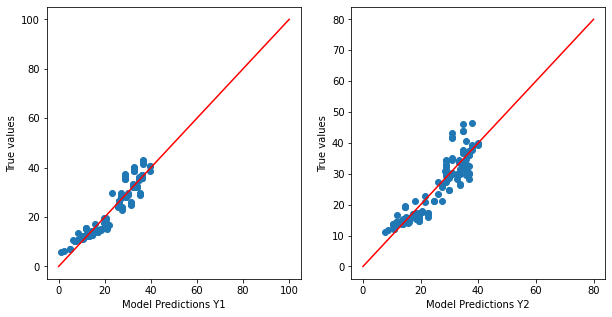

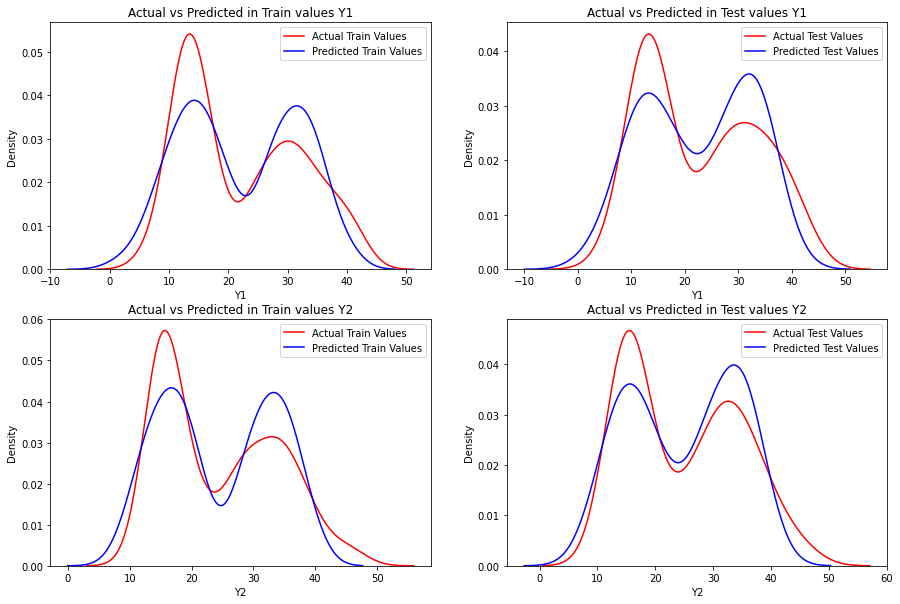

In [44]:
model_check_visualization(y_train, yhat_train1, y_test, yhat_test1)

### Nhận xét: 
~89% variation của Y1,Y2 được giải thích bằng model này
=> Model phù hợp với dữ liệu nhưng chưa tối ưu 

### Model_2: [Cleaned_data] - Linear & MinMaxScaler & Polynomial

In [45]:
for i in range(2,6):
    model_name = f'[Clean_data] - Linear & MinMaxScaler & Poly(degree=%d)' %i
    my_steps = [('scale', MinMaxScaler()),
             ('polynomial',PolynomialFeatures(degree=i)),
            ('model', LinearRegression())]
    yhat_train, yhat_test, result = build_model(model_name,my_steps,X_train,y_train,X_test,y_test)
    display(result)

,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Clean_data] - Linear & MinMaxScaler & Poly(degree=2),0.938151,0.942602,5.746606,5.73104,1.637764,1.592243


,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Clean_data] - Linear & MinMaxScaler & Poly(degree=3),0.979835,0.975515,1.831629,2.357238,0.97716,1.084123


,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Clean_data] - Linear & MinMaxScaler & Poly(degree=4),0.982553,0.976641,1.580552,2.237929,0.843512,0.99801


,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Clean_data] - Linear & MinMaxScaler & Poly(degree=5),0.984151,0.979783,1.427943,1.922263,0.713021,0.809188


### Nhận xét:
- với degree = 5 thì hiệu suất tăng không đáng kể ==> chọn degree = 4

In [46]:
#Visualize [Clean_data] - Linear & MinMaxScaler & Poly(degree=4) để kiểm tra
model_name2 = '[Clean_data] - Linear & MinMaxScaler & Poly(degree=4)'
my_steps2 = [('scale', MinMaxScaler()),
             ('polynomial',PolynomialFeatures(degree=4)),
            ('model', LinearRegression())]
yhat_train2, yhat_test2, result2 = build_model(model_name2,my_steps2,X_train,y_train,X_test,y_test)

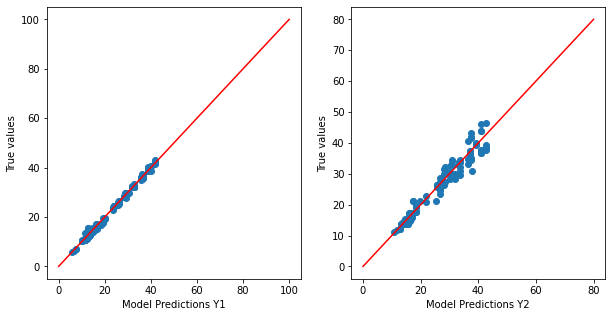

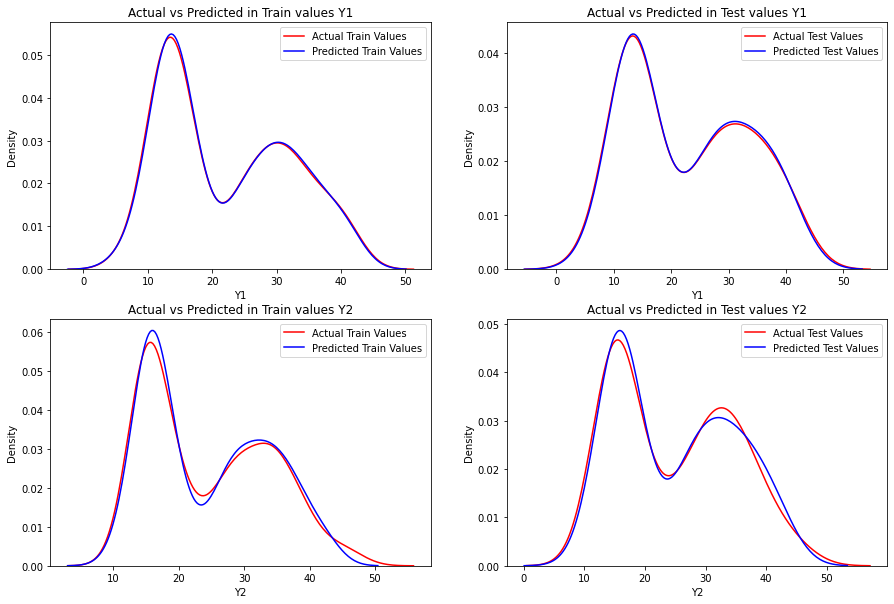

In [47]:
model_check_visualization(y_train, yhat_train2, y_test, yhat_test2)

### Nhận xét:
- ~98% variation của Y1,Y2 được giải thích bằng model này
- => Model phù hợp với dữ liệu, hiệu suất đã cải thiện đáng kể 
- Từ distribution plot có thể thấy model cho kết quả dự đoán rất tốt trên Y1 train & test. Tuy nhiên đối với Y2, vẫn có nhưng sai số ở đỉnh và phần đuôi bên phải của phân phối 

### Model_3: [Original_data] & Linear & MinMaxScaler & Polynomial

In [48]:
# lựa chọn X và y
X_o = df.drop(['Y1','Y2'],axis=1)
y_o = df[['Y1','Y2']]

In [49]:
# tách dữ liệu thành train và test
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, train_size=0.8, random_state=0)
X_train_o.shape, X_test_o.shape

((614, 8), (154, 8))

In [54]:
for i in range(2,6):
    model_name = f'[Original_data] - Linear & MinMaxScaler & Poly(degree=%d)' %i
    my_steps = [('scale', MinMaxScaler()),
             ('polynomial',PolynomialFeatures(degree=i)),
            ('model', LinearRegression())]
    yhat_train, yhat_test, result = build_model(model_name,my_steps,X_train_o,y_train_o,X_test_o,y_test_o)
    display(result)

,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Original_data] - Linear & MinMaxScaler & Poly(degree=2),0.983998,0.980028,1.457377,1.930401,0.795121,0.919769


,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Original_data] - Linear & MinMaxScaler & Poly(degree=3),0.988567,0.981881,1.031257,1.729032,0.652093,0.853145


,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Original_data] - Linear & MinMaxScaler & Poly(degree=4),0.993441,0.986462,0.59071,1.299044,0.438644,0.70585


,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Original_data] - Linear & MinMaxScaler & Poly(degree=5),0.996803,0.978995,0.288122,1.995944,0.327601,0.837631


### Nhận xét: 
- Tương tự trên => chọn degree=4

In [51]:
model_name3 = '[Original_data] - Linear & MinMaxScaler & Poly(degree=4)'
my_steps3 = [('scale', MinMaxScaler()),
             ('polynomial',PolynomialFeatures(degree=4)),
            ('model', LinearRegression())]
yhat_train3, yhat_test3, result3 = build_model(model_name3,my_steps3,X_train_o,y_train_o,X_test_o,y_test_o)

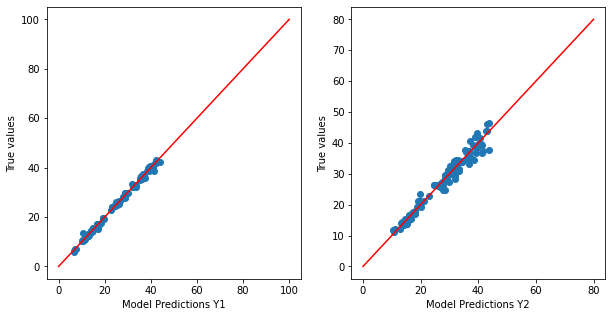

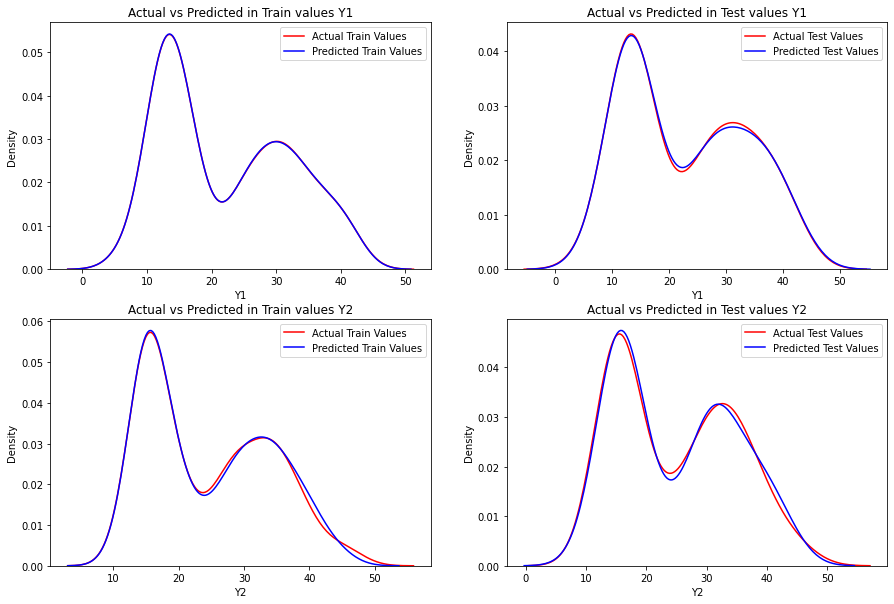

In [52]:
model_check_visualization(y_train_o, yhat_train3, y_test_o, yhat_test3)

### Nhận xét:
- Có thể thấy với model này, sai số của dữ liệu dự đoán và thực tế trên Y2 đã giảm đáng kể

In [53]:
## So sánh các model
final = pd.concat([result1,result2,result3], axis=0)
final

,R2_train,R2_test,MSE_train,MSE_test,MAE_train,MAE_test
[Cleaned_data] - Linear & MinMaxScaler,0.890859,0.879611,10.204039,12.142301,2.370989,2.579174
[Clean_data] - Linear & MinMaxScaler & Poly(degree=4),0.982553,0.976641,1.580552,2.237929,0.843512,0.998010
[Original_data] - Linear & MinMaxScaler & Poly(degree=4),0.993441,0.986462,0.590710,1.299044,0.438644,0.705850


### Kết luận: 
- Lựa chọn Model 3 **[Original_data] - Linear & MinMaxScaler & Poly(degree=4)**
- vì đây là Model 3 có hiệu suất cao nhất, sai số trung bình nhỏ nhất